# Walk-Forward Analysis Results

This notebook loads the backtest results from `backtest_results.db` and visualizes the predicted vs. actual outcomes for each strategy.

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
# Define the path to the database
# Assuming PriceData directory is located one level above the notebooks directory
db_path = os.path.join('..', 'PriceData', 'backtest_results2.db')

In [18]:
def get_strategy_data_from_db(db_path):
    """
    Connects to the database, retrieves data for each strategy table,
    performs basic validation and processing, and returns a dictionary of DataFrames.
    """
    print("--- Fetching Strategy Data ---")
    strategy_data = {}
    required_cols = ['date', 'current_base_accuracy', 'current_rf_accuracy'] # Define required columns

    try:
        with sqlite3.connect(db_path) as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
            tables = cursor.fetchall()
            strategy_tables = [table[0] for table in tables if table[0] not in ['overall_results', 'sqlite_sequence']]
            print(f"Found strategy tables: {strategy_tables}")

            if not strategy_tables:
                print("No strategy tables found.")
                return None # Return None if no tables

            for strategy_name in strategy_tables:
                print(f"\nProcessing strategy: {strategy_name}")
                try:
                    query = f"SELECT * FROM {strategy_name}"
                    df = pd.read_sql(query, conn)

                    # Check for required columns
                    if not all(col in df.columns for col in required_cols):
                        missing_cols = [col for col in required_cols if col not in df.columns]
                        print(f"  Warning: Missing required columns {missing_cols} in table {strategy_name}. Skipping.")
                        continue

                    # Convert 'date' to datetime and sort
                    df['date'] = pd.to_datetime(df['date'])
                    df = df.sort_values('date').copy() # Use .copy() to avoid SettingWithCopyWarning

                    strategy_data[strategy_name] = df
                    print(f"  Data fetched and processed for {strategy_name}")

                except Exception as e:
                    print(f"  Error processing table {strategy_name}: {e}")

        print("\nDatabase connection automatically closed.")
        return strategy_data if strategy_data else None # Return data or None if empty after processing

    except sqlite3.Error as e:
        print(f"Database connection error: {e}")
        return None # Return None on connection error
    finally:
        print("--- Finished Fetching Strategy Data ---")

# Define the path to the database
db_path = os.path.join('..', 'PriceData', 'backtest_results2.db')

# Fetch the data
all_strategy_data = get_strategy_data_from_db(db_path)

# Check if data was fetched successfully
if all_strategy_data:
    print(f"\nSuccessfully fetched data for {len(all_strategy_data)} strategies.")
else:
    print("\nNo strategy data was fetched.")

--- Fetching Strategy Data ---
Found strategy tables: ['KELTNER_indicator', 'BBANDS_indicator', 'MACDEXT_indicator', 'PLUS_MINUS_DI_indicator']

Processing strategy: KELTNER_indicator
  Data fetched and processed for KELTNER_indicator

Processing strategy: BBANDS_indicator
  Data fetched and processed for BBANDS_indicator

Processing strategy: MACDEXT_indicator
  Data fetched and processed for MACDEXT_indicator

Processing strategy: PLUS_MINUS_DI_indicator
  Data fetched and processed for PLUS_MINUS_DI_indicator

Database connection automatically closed.
--- Finished Fetching Strategy Data ---

Successfully fetched data for 4 strategies.


In [ ]:
def plot_base_rf_accuracy(strategy_data_dict):
    """
    Plots 'current_base_accuracy' and 'current_rf_accuracy' vs 'date'
    for each strategy provided in the strategy_data_dict.
    """
    print("\n--- Plotting Base vs RF Accuracy ---")
    if not strategy_data_dict:
        print("No strategy data provided to plot.")
        return

    for strategy_name, df in strategy_data_dict.items():
        print(f"Plotting for strategy: {strategy_name}")
        try:
            # Create plot for the current strategy
            plt.figure(figsize=(12, 6))
            plt.plot(df['date'], df['current_base_accuracy'], label='Base Accuracy', linestyle='-', alpha=0.7)
            plt.plot(df['date'], df['current_rf_accuracy'], label='RF Accuracy', linestyle='-', alpha=0.7)

            plt.title(f'Base vs RF Accuracy Over Time - Strategy: {strategy_name}')
            plt.xlabel('Date')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            print(f"  Plot generated for {strategy_name}")

        except Exception as e:
            print(f"  Error plotting data for table {strategy_name}: {e}")

    print("--- Finished Plotting Base vs RF Accuracy ---")

# Call the plotting function only if data exists
if all_strategy_data:
    plot_base_rf_accuracy(all_strategy_data)
else:
    print("Skipping Base vs RF Accuracy plots as no data was loaded.")


--- Plotting Accuracy Difference (RF - Base) ---
Plotting difference for strategy: KELTNER_indicator


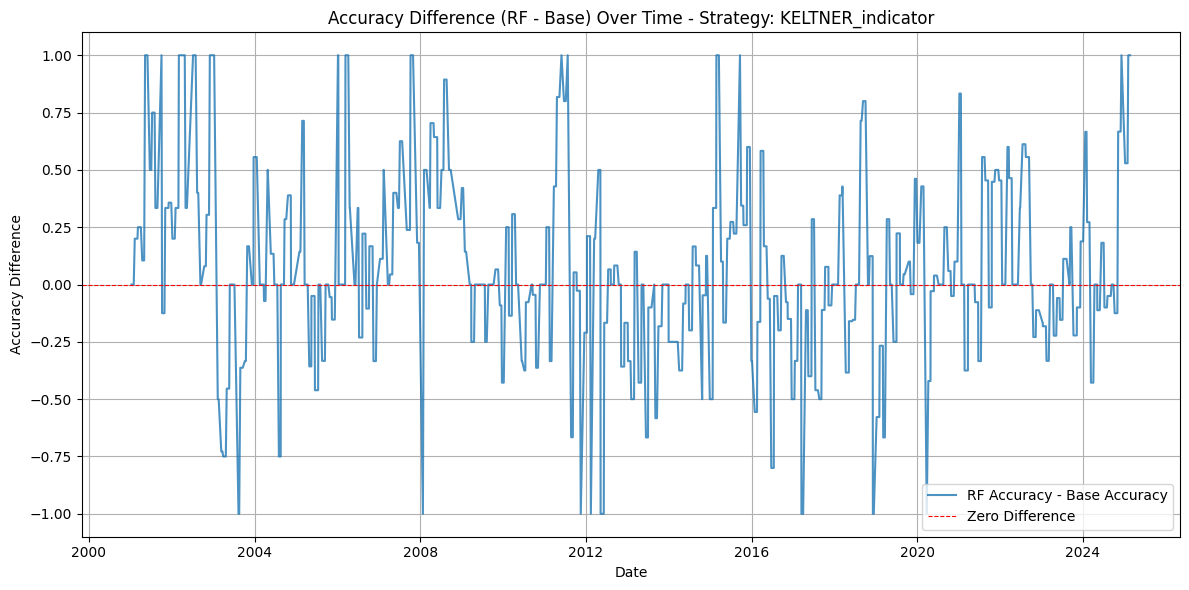

  Difference plot generated for KELTNER_indicator
Plotting difference for strategy: BBANDS_indicator


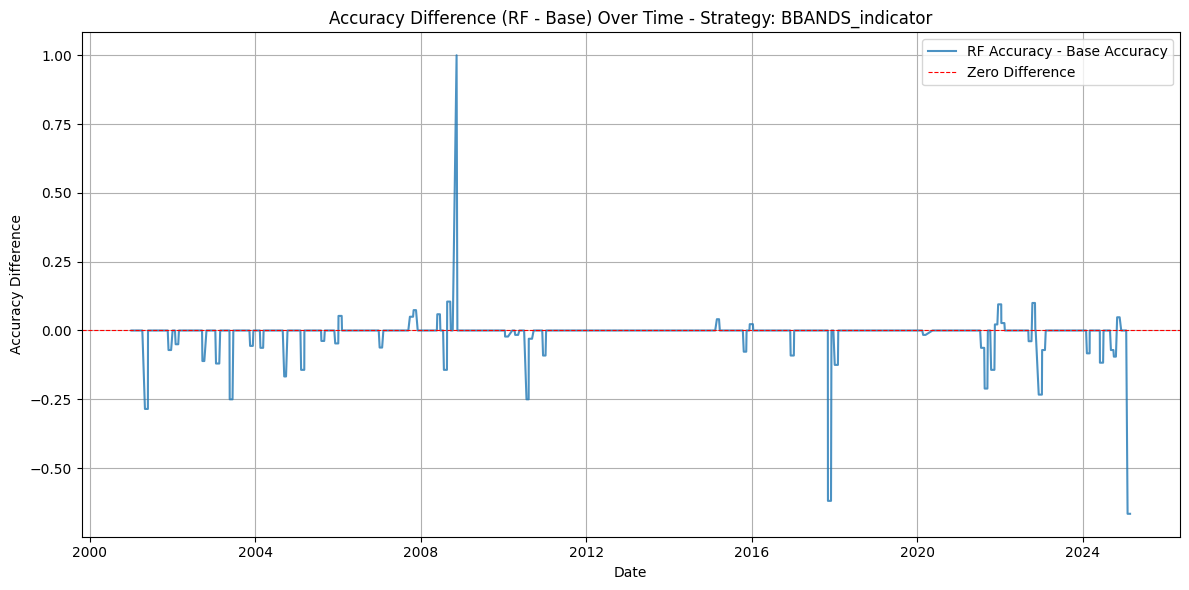

  Difference plot generated for BBANDS_indicator
Plotting difference for strategy: MACDEXT_indicator


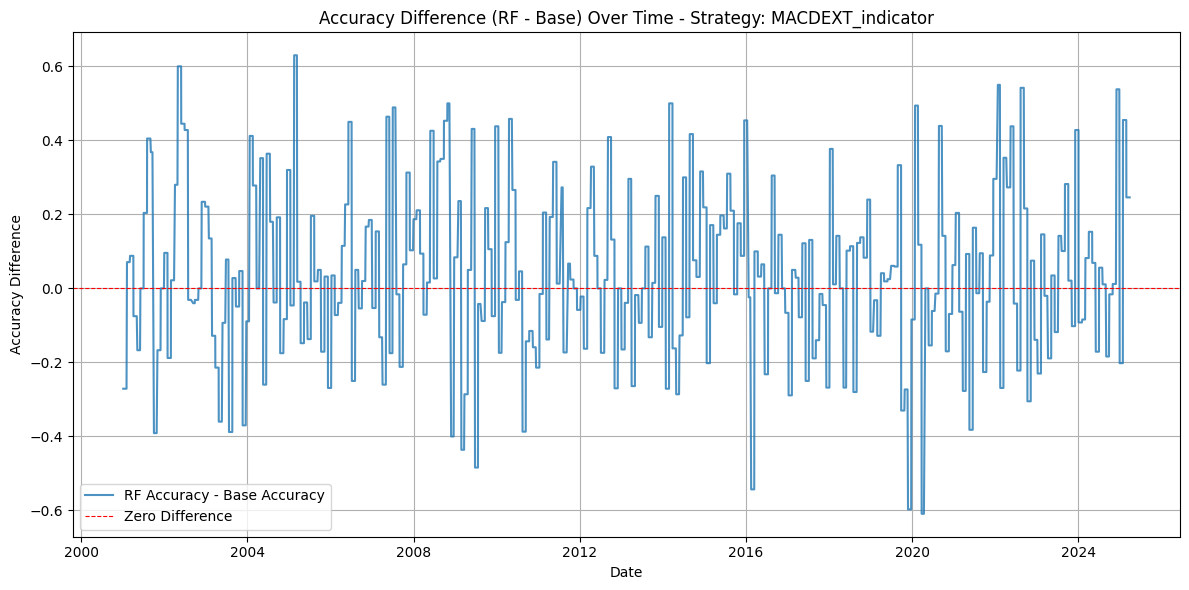

  Difference plot generated for MACDEXT_indicator
Plotting difference for strategy: PLUS_MINUS_DI_indicator


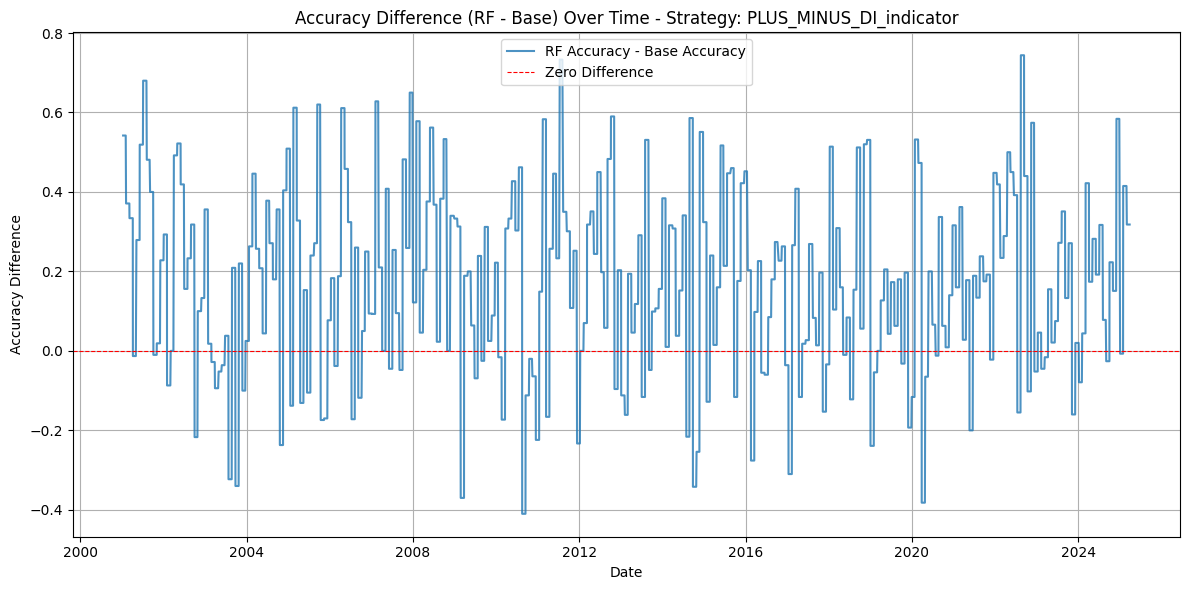

  Difference plot generated for PLUS_MINUS_DI_indicator
--- Finished Plotting Accuracy Difference ---


In [19]:
def plot_accuracy_difference(strategy_data_dict):
    """
    Calculates and plots the difference between RF and Base accuracy vs 'date'
    for each strategy provided in the strategy_data_dict.
    """
    print("\n--- Plotting Accuracy Difference (RF - Base) ---")
    if not strategy_data_dict:
        print("No strategy data provided to plot.")
        return

    for strategy_name, df_original in strategy_data_dict.items():
        print(f"Plotting difference for strategy: {strategy_name}")
        try:
            # Make a copy to avoid modifying the original DataFrame
            df = df_original.copy()

            # Calculate the difference
            df['accuracy_diff'] = df['current_rf_accuracy'] - df['current_base_accuracy']

            # Create plot for the current strategy
            plt.figure(figsize=(12, 6))
            plt.plot(df['date'], df['accuracy_diff'], label='RF Accuracy - Base Accuracy', linestyle='-', alpha=0.8)
            plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Zero Difference') # Add a line at y=0

            plt.title(f'Accuracy Difference (RF - Base) Over Time - Strategy: {strategy_name}')
            plt.xlabel('Date')
            plt.ylabel('Accuracy Difference')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            print(f"  Difference plot generated for {strategy_name}")

        except Exception as e:
            print(f"  Error plotting difference for table {strategy_name}: {e}")

    print("--- Finished Plotting Accuracy Difference ---")

# Call the plotting function only if data exists
if all_strategy_data:
    plot_accuracy_difference(all_strategy_data)
else:
    print("Skipping Accuracy Difference plots as no data was loaded.")